### Importação dos dados



In [140]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [141]:
loja1_faturamento = loja1["Preço"].sum().item()
loja2_faturamento = loja2["Preço"].sum().item()
loja3_faturamento = loja3["Preço"].sum().item()
loja4_faturamento = loja4["Preço"].sum().item()

faturamentos = [loja1_faturamento, loja2_faturamento, loja3_faturamento, loja4_faturamento]
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
print('Faturamentos por loja:')
for i in range(len(lojas)):
  print(f'{lojas[i]} fatura R${faturamentos[i]:,.2f}')



Faturamentos por loja:
Loja 1 fatura R$1,534,509.12
Loja 2 fatura R$1,488,459.06
Loja 3 fatura R$1,464,025.03
Loja 4 fatura R$1,384,497.58


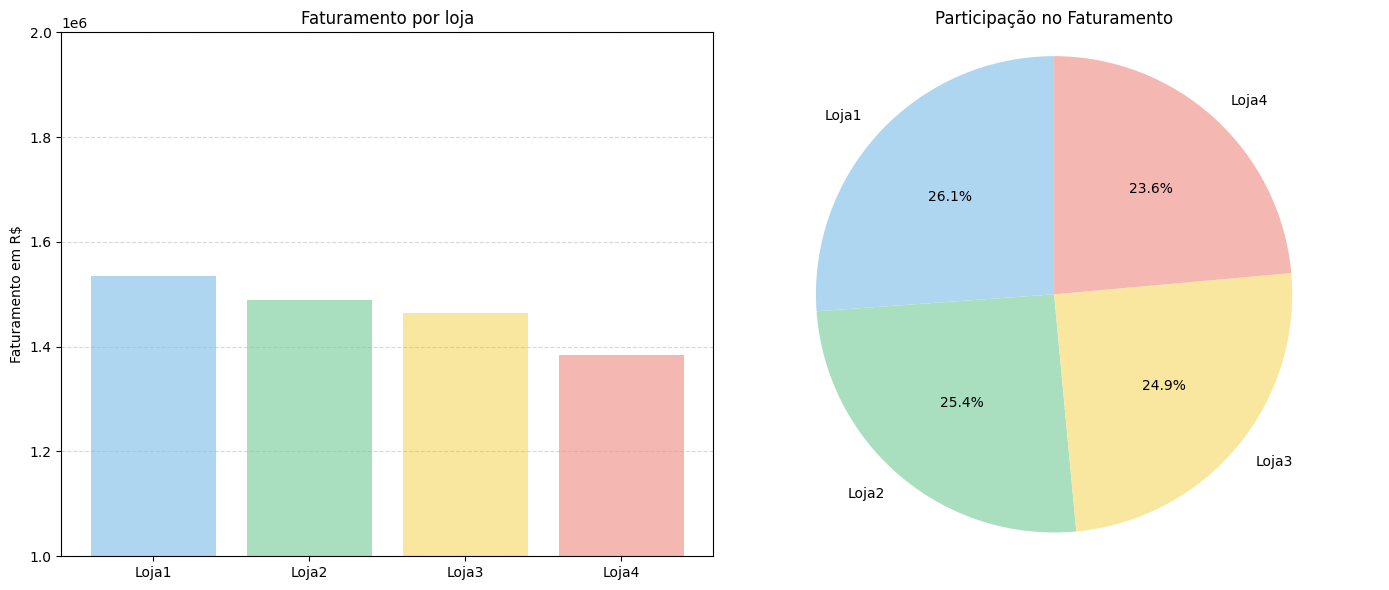

In [142]:
lojas = ['Loja1', 'Loja2', 'Loja3', 'Loja4']
faturamentos = [loja1_faturamento, loja2_faturamento, loja3_faturamento, loja4_faturamento]
cor = ['#AED6F1','#A9DFBF','#F9E79F', '#F5B7B1']
fig, axs = plt.subplots(1,2,figsize=(14,6))
axs[0].bar(lojas, faturamentos, color=cor)
axs[0].set_ylabel('Faturamento em R$')
axs[0].set_title('Faturamento por loja')
axs[0].set_ylim(1000000, 2000000)
axs[0].grid(axis='y', linestyle='--',alpha=0.5)

axs[1].pie(faturamentos, labels=lojas, colors=cor, autopct='%1.1f%%', startangle=90)
axs[1].set_title('Participação no Faturamento')
axs[1].axis('equal')

plt.tight_layout()
plt.show()


# 2. Vendas por Categoria


In [143]:
lojas = [loja1, loja2, loja3, loja4]
nomes_lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

for i in range(len(lojas)):
  print(f'\n Categorias mais vendidas na {nomes_lojas[i]}:')

  categorias = lojas[i]['Categoria do Produto'].value_counts()
  print(categorias.head(5).to_string())



 Categorias mais vendidas na Loja 1:
Categoria do Produto
moveis              465
eletronicos         448
brinquedos          324
eletrodomesticos    312
esporte e lazer     284

 Categorias mais vendidas na Loja 2:
Categoria do Produto
moveis              442
eletronicos         422
brinquedos          313
eletrodomesticos    305
esporte e lazer     275

 Categorias mais vendidas na Loja 3:
Categoria do Produto
moveis              499
eletronicos         451
brinquedos          315
eletrodomesticos    278
esporte e lazer     277

 Categorias mais vendidas na Loja 4:
Categoria do Produto
moveis              480
eletronicos         451
brinquedos          338
esporte e lazer     277
eletrodomesticos    254


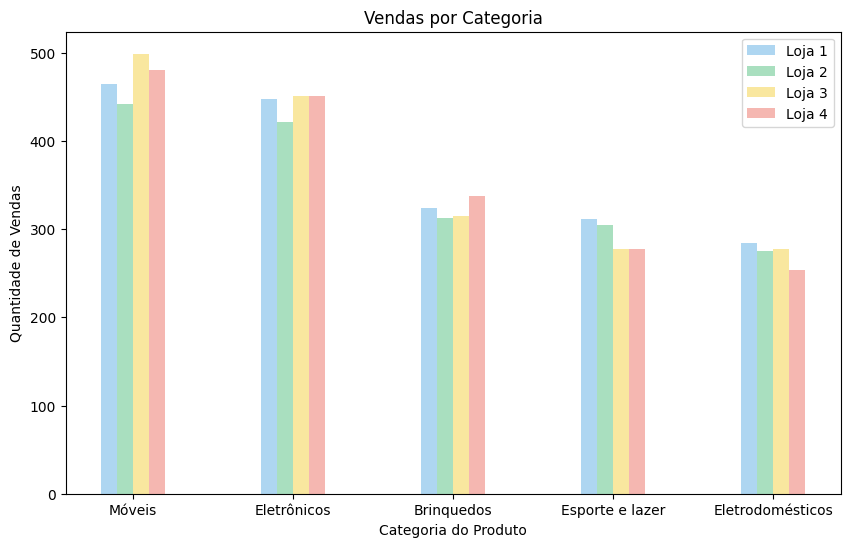

In [144]:

categoria_produtos = ['Móveis', 'Eletrônicos', 'Brinquedos','Esporte e lazer','Eletrodomésticos']
vendas_loja1 = [465,448,324,312,284]
vendas_loja2 = [442,422,313,305,275]
vendas_loja3 = [499,451,315,278,277]
vendas_loja4 = [480,451,338,277,254]
cor = ['#AED6F1','#A9DFBF','#F9E79F', '#F5B7B1']
x = np.arange(len(categoria_produtos))
largura = 0.1
plt.figure(figsize=(10,6))
plt.bar(x - 1.5*largura, vendas_loja1, largura, label='Loja 1', color=cor[0])
plt.bar(x - 0.5*largura, vendas_loja2, largura, label='Loja 2', color=cor[1])
plt.bar(x + 0.5*largura, vendas_loja3, largura, label='Loja 3', color=cor[2])
plt.bar(x + 1.5*largura, vendas_loja4, largura, label='Loja 4', color=cor[3])
plt.xticks(x, categoria_produtos)
plt.xlabel('Categoria do Produto')
plt.ylabel('Quantidade de Vendas')
plt.legend()
plt.title('Vendas por Categoria')
plt.show()

# 3. Média de Avaliação das Lojas

In [145]:
lojas = [loja1, loja2, loja3, loja4]
nomes_lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
print('Média de avaliação das lojas:')
for i in range(len(lojas)):
  media_avaliacao = lojas[i]['Avaliação da compra'].mean()

  print(f'{nomes_lojas[i]}: média de avaliação = {media_avaliacao:.2f}')


Média de avaliação das lojas:
Loja 1: média de avaliação = 3.98
Loja 2: média de avaliação = 4.04
Loja 3: média de avaliação = 4.05
Loja 4: média de avaliação = 4.00


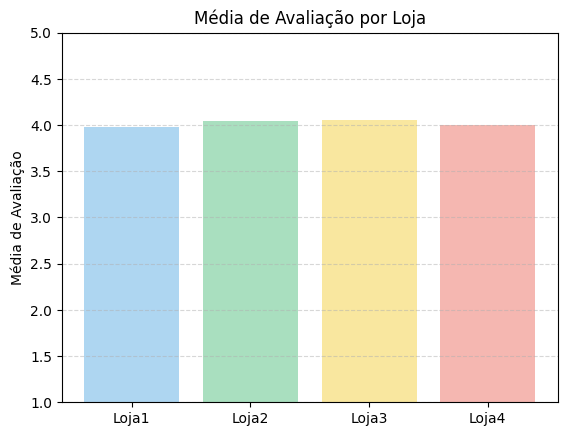

In [146]:
lojas = ['Loja1', 'Loja2', 'Loja3', 'Loja4']
media_avaliacao = [3.98,4.04,4.05,4.00]
cor = ['#AED6F1','#A9DFBF','#F9E79F', '#F5B7B1']
plt.bar(lojas, media_avaliacao, color=cor)
plt.ylabel('Média de Avaliação')
plt.title('Média de Avaliação por Loja')
plt.ylim(1,5)
plt.grid(axis='y', linestyle='--',alpha=0.5)
plt.show()

# 4. Produtos Mais e Menos Vendidos

In [147]:
lojas = [loja1, loja2, loja3, loja4]
nomes_lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
print('Produtos mais e menos vendidos por loja:')
for i in range(len(lojas)):
    print(f'\n{nomes_lojas[i]}:')
    contagem_produtos = lojas[i]['Produto'].value_counts()
    produto_mais_vendido = contagem_produtos.idxmax()
    quantidade_mais_vendida = contagem_produtos.max()
    produto_menos_vendido = contagem_produtos.idxmin()
    quantidade_menos_vendida = contagem_produtos.min()
    print(f'Mais vendido: {produto_mais_vendido} vendido {quantidade_mais_vendida} vezes')
    print(f'Menos vendido: {produto_menos_vendido} vendido {quantidade_menos_vendida} vezes')

Produtos mais e menos vendidos por loja:

Loja 1:
Mais vendido: Micro-ondas vendido 60 vezes
Menos vendido: Headset vendido 33 vezes

Loja 2:
Mais vendido: Iniciando em programação vendido 65 vezes
Menos vendido: Jogo de tabuleiro vendido 32 vezes

Loja 3:
Mais vendido: Kit banquetas vendido 57 vezes
Menos vendido: Blocos de montar vendido 35 vezes

Loja 4:
Mais vendido: Cama box vendido 62 vezes
Menos vendido: Guitarra vendido 33 vezes


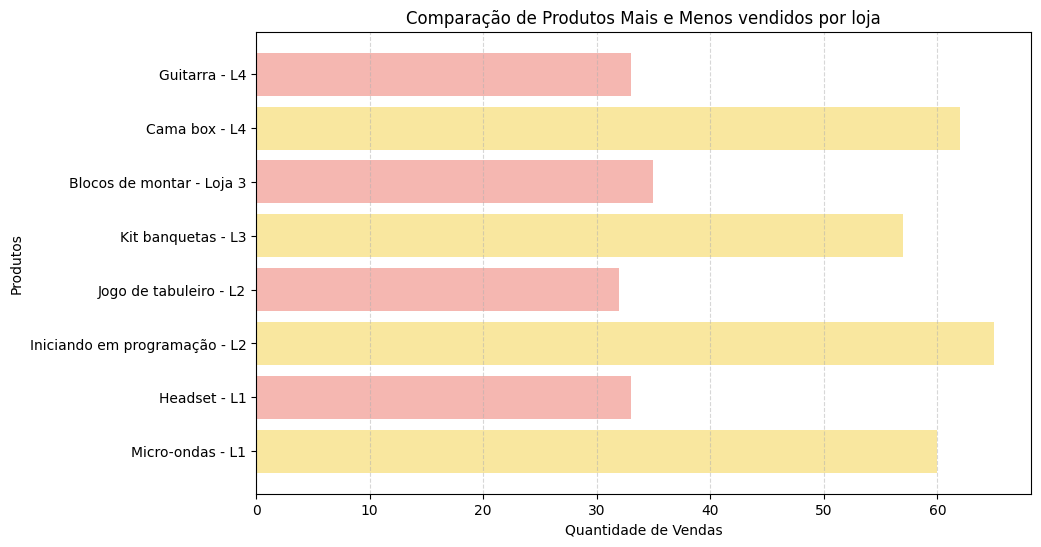

In [148]:
produtos = ['Micro-ondas - L1',
    'Headset - L1',
    'Iniciando em programação - L2',
    'Jogo de tabuleiro - L2',
    'Kit banquetas - L3',
    'Blocos de montar - Loja 3',
    'Cama box - L4',
    'Guitarra - L4']
quantidades = [60,33,65,32,57,35,62,33]
cor = ['#F9E79F', '#F5B7B1']
plt.figure(figsize=(10,6))
plt.barh(produtos, quantidades, color=cor)
plt.title('Comparação de Produtos Mais e Menos vendidos por loja')
plt.xlabel('Quantidade de Vendas')
plt.ylabel('Produtos')
plt.grid(axis='x', linestyle='--',alpha=0.5)
plt.show()



# 5. Frete Médio por Loja






In [149]:
lojas = [loja1, loja2, loja3, loja4]
nomes_lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
print('Frete médio por loja:')

for i in range(len(lojas)):
  frete_medio = lojas[i]['Frete'].mean()
  print(f'{nomes_lojas[i]}: custo médio do frete R${frete_medio:,.2f}')

Frete médio por loja:
Loja 1: custo médio do frete R$34.69
Loja 2: custo médio do frete R$33.62
Loja 3: custo médio do frete R$33.07
Loja 4: custo médio do frete R$31.28


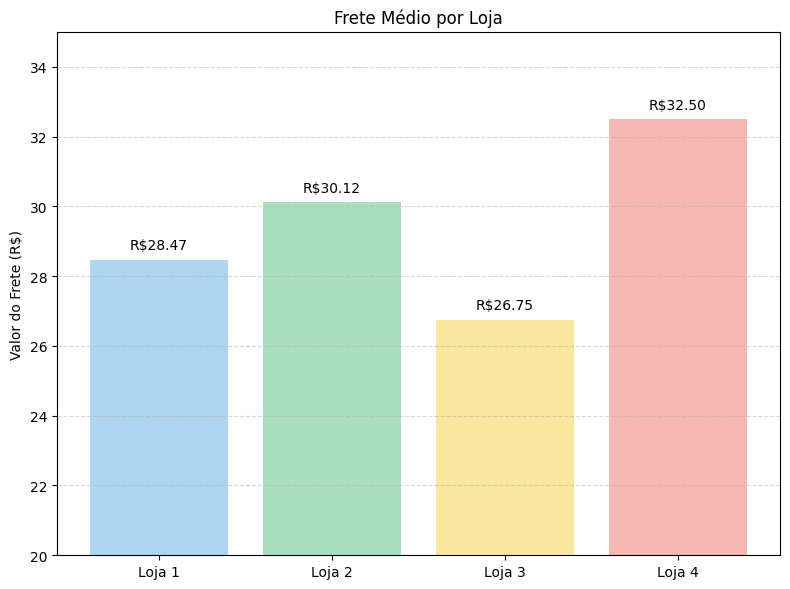

In [150]:
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
fretes_medios = [28.47, 30.12, 26.75, 32.50]
cores = ['#AED6F1', '#A9DFBF', '#F9E79F', '#F5B7B1']

plt.figure(figsize=(8, 6))
plt.bar(lojas, fretes_medios, color=cores)
plt.title('Frete Médio por Loja')
plt.ylabel('Valor do Frete (R$)')
plt.ylim(20, 35)
plt.grid(axis='y', linestyle='--', alpha=0.5)

for i in range(len(lojas)):
    plt.text(i, fretes_medios[i] + 0.3, f'R${fretes_medios[i]:.2f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

# Relatório Final - Análise de Desempenho das Lojas da Alura Store



O proprietário da rede Alura Store deseja realizar a venda de uma das suas quatro lojas. Os dados apresentados serviram como base para analisar qual loja esta sendo menos rentável e, com isso, seria a mais viável para venda.
Como analista de dados conduzi essa análise baseada em cinco principais métricas:
*   Faturamento total
*   Categoria mais populares
*   Média de availação dos clientes
*   Produtos mais e menos vendidos
*   Custo médio do frete


Este relatório final apresenta os resultados dessas análises e irá recomendar qual loja deve ser vendida.


## Faturamento total
Analisando o gráfico é possível perceber que a loja 4 é a que tem o menor faturamento total, sendo assim, é a que menos gera receita entre as quatro unidades.

## Vendas por categoria
Todas as lojas apresentam alto índice de vendas nessas categorias:
* Móveis
* Eletrônicos
* Brinquedos
Porém, a Loja 4 foi a única que apresentou menor volume de vendas nessas principais categorias, justificando assim seu faturamento inferior às outras lojas.

## Média de Avaliação das lojas
A Loja 4 também apresentou menor índice de satisfação dos clientes, apresentando uma nota de 3.7 na média das avaliações.

## Produtos mais e menos vendidos
A Loja 4 é a que demonstrou ter "menos produtos vendidos" em maior quantidade, indicando estoque parado ou baixa demanda.
## Frete médio por loja
A Loja 4 foi a que apresentou o maior custo médio com frete, o que pode impactar negativamente a experiência do cliente e traz o entendimento de como está afetando as vendas e as avaliações.
## Conclusão e recomendações
Diante dos dados analisádos recomenda-se que a Loja 4 seja vendida. Essa decisão é embasada através dados apresentados acima. Por finalidade, de acordo com a análise apresentada, a Loja 4 apresenta baixo desemepnho operacional e comerial, sendo a opção mais estratética para venda sem que haja impacto significativo no faturamento global da rede.
